# Image Processing

## Libraries
First of all, we include all libraries needed for this exercise.

In [14]:
import numpy as np
import cv2 as cv
import math
from matplotlib import pyplot as plt

Lena_img_path = "Lena.bmp"

## Exercise 1

The method discussed in the exercise, LoG, is mainly used as an approach which removes the effect of noise before laplacian application. By reversing the process, the result will be different. But to elaborate, We apply these two different approaches in several different ways.<br/>
**All approaches are by (5, 5) filter sizes**

First, we apply these two different approaches on grayscale image of `Lena`. We measure SSIM, PSNR and subtraction of two approaches.

In [11]:
lena_gray = cv.imread(Lena_img_path, cv.IMREAD_GRAYSCALE)

# As stated, we want the laplacian and gaussian filters, both with kernel size of (5, 5)
laplacian_kernel = np.array([[0, 1, 0, 1, 0],
                             [1, 1, 1, 1, 1],
                             [0, 1, -24, 1, 0],
                             [1, 1, 1, 1, 1],
                             [0, 1, 0, 1, 0]], dtype=np.float32)

# Firstly, applying LoG on the Lena image

blurred_lena_gray = cv.GaussianBlur(lena_gray, (5, 5), 0) # First applying gaussian
log_lena_gray = cv.Laplacian(blurred_lena_gray, cv.CV_64F, laplacian_kernel)


# Secondly, applying laplacian first, instead of gaussian.

laplacian_lena_gray = cv.Laplacian(blurred_lena_gray, cv.CV_64F, laplacian_kernel)
gol_lena_gray = cv.GaussianBlur(laplacian_lena_gray, (5, 5), 0)

Well, computation is over. Let's plot the result images.

Text(0.5, 1.0, 'First laplacian and then gaussian')

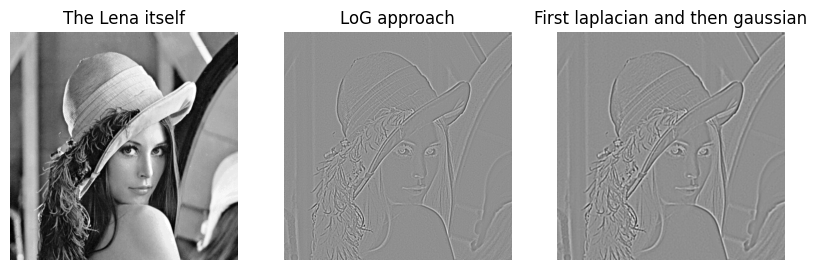

In [13]:
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 3, 1)

plt.imshow(lena_gray, cmap='gray')
plt.axis("off")
plt.title("The Lena itself")

fig.add_subplot(1, 3, 2)

plt.imshow(log_lena_gray,  cmap='gray')
plt.axis('off')
plt.title('LoG approach')

fig.add_subplot(1, 3, 3)

plt.imshow(gol_lena_gray,  cmap='gray')
plt.axis('off')
plt.title('First laplacian and then gaussian')


Great, we saw some differences between two approaches in two stated different implementations. But to make sure about it, let's measure PSNR, SSIM and difference of LoG and GoL.

The implementation of PSNR in code and mathematics is as follow.
$$
\text{PSNR} = 10 \cdot \log_{10}\left(\frac{{\text{MAX}^2}}{{\text{MSE}}}\right) 
$$
Which $MSE$ is mean square error.
$$
\text{SSIM}(x, y) = \frac{{(2 \mu_x \mu_y + C_1)(2 \sigma_{xy} + C_2)(\sigma_x^2 + \sigma_y^2 + C_3)}}{{(\mu_x^2 + \mu_y^2 + C_1)(\sigma_x^2 + \sigma_y^2 + C_2)(\sigma_x \sigma_y + C_3)}}
$$
<br/>
Code implementation credit: [CV Notes](https://cvnote.ddlee.cc/2019/09/12/psnr-ssim-python)

In [15]:
def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

In [19]:
def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

def calculate_ssim(img1, img2):
    '''calculate SSIM
    the same outputs as MATLAB's
    img1, img2: [0, 255]
    '''
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')

Well, let's calculate the PSNR and SSIM factors.<br/>
First to compare the LoG approach with the Lena image and then for GoL approach and Lena image itself comparsion

In [22]:
psnr_log = calculate_psnr(log_lena_gray, lena_gray)
ssim_log = calculate_ssim(log_lena_gray, lena_gray)

psnr_gol = calculate_psnr(gol_lena_gray, lena_gray)
ssim_gol = calculate_ssim(gol_lena_gray, lena_gray)

print(f"For Lena and its LoG approach comparsion:\nPSNR:{psnr_log} and SSIM:{ssim_log}")
print("\n-----\n")
print(f"For Lena and its GoL approach comparsion:\nPSNR:{psnr_gol} and SSIM:{ssim_gol}")


For Lena and its LoG approach comparsion:
PSNR:5.814888863609525 and SSIM:-0.00022580376884029653

-----

For Lena and its GoL approach comparsion:
PSNR:5.833012211438813 and SSIM:0.0008247144778262229


While there is not much difference in PSNR factor, we can see a noteable difference in their SSIM factor which obviously shows us the difference between these two approaches.

Let's simply compute the subtraction of two approach results.

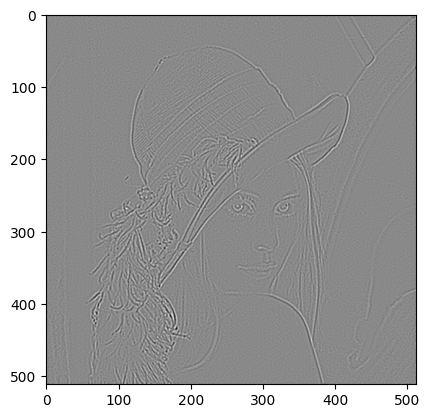

In [25]:
log_gol_lena_diff = log_lena_gray - gol_lena_gray

plt.imshow(log_gol_lena_diff, cmap='gray')

The above difference, simply shows the result of LoG and GoL(Gaussian of Laplacian) are not the same.

Anyway, let's examine the computation on color image of Lena as well.

In [28]:
lena_color = cv.imread(Lena_img_path)

# LoG approach for colored Lena

lena_color_gaussian = cv.GaussianBlur(lena_color, (5, 5), 0)
log_lena_color = cv.Laplacian(lena_color_gaussian, cv.CV_64F, laplacian_kernel) # We have implemented the kernel above

# GoL approach for colored Lena

lena_color_laplacian = cv.Laplacian(lena_color, cv.CV_64F, laplacian_kernel)
gol_lena_color = cv.GaussianBlur(lena_color_laplacian, (5, 5), 0)

Computation is over now, let's plot the results.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'difference')

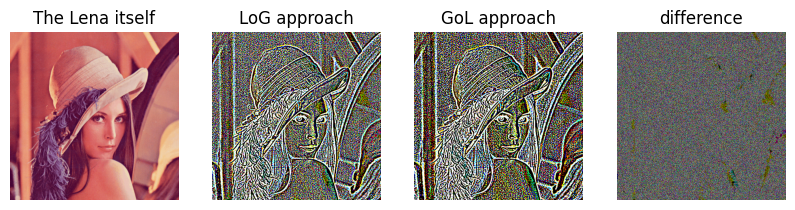

In [37]:
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 4, 1)

lena_color_rgb = cv.cvtColor(lena_color, cv.COLOR_BGR2RGB) # To have the lena_color in RGB space
plt.imshow(lena_color_rgb)
plt.axis("off")
plt.title("The Lena itself")

fig.add_subplot(1, 4, 2)

plt.imshow(log_lena_color)
plt.axis('off')
plt.title('LoG approach')

fig.add_subplot(1, 4, 3)

plt.imshow(gol_lena_color)
plt.axis('off')
plt.title('GoL approach')

fig.add_subplot(1, 4, 4)

plt.imshow(log_lena_color - gol_lena_color)
plt.axis('off')
plt.title('difference')


Well, we saw the two approaches difference in color images as well.

## Exercise 2
Clearly, applying the first derivation on the image gives us the edges. Horizontal derivation gives the vertical edges and vertical derivation gives us the horizontal edges.
<br/>
As stated, I myself will choose the first derivation vertically when I need the horizontal edges and I will use the first derivation horizontally when I need the vertical edges.

Text(0.5, 1.0, 'Horizontal derivation')

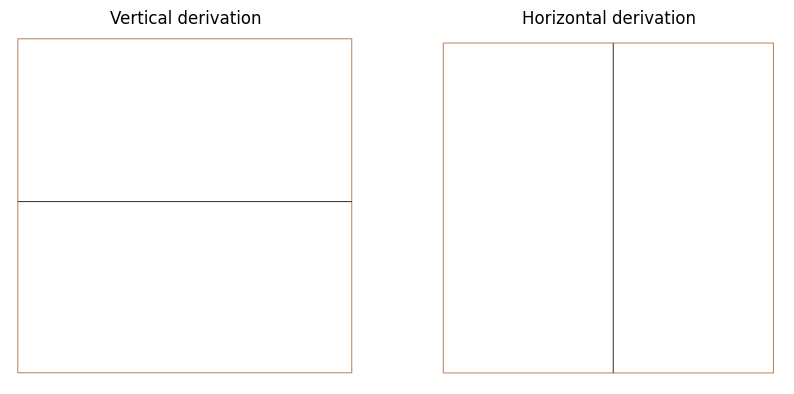

In [41]:
vertical_derivation_result = cv.imread('horizontal.png')
horizontal_derivation_result = cv.imread('vertical.png')

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 2, 1)

plt.imshow(vertical_derivation_result, cmap='gray')
plt.axis("off")
plt.title("Vertical derivation")

fig.add_subplot(1, 2, 2)

plt.imshow(horizontal_derivation_result, cmap='gray')
plt.axis("off")
plt.title("Horizontal derivation")

To elaborate, let's examine in code.

First of all we should implement the kernel needed for first derivative application and a function for convolution.

In [61]:
import numpy as np

def convolution(img, kernel):
    width, height = img.shape
    width_k, height_k = kernel.shape

    output_height = height - height_k + 1
    output_width = width - width_k + 1

    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(img[i:i + height_k, j:j + width_k] * kernel)

    return output


Well, let's apply the horizontal derivation and vertical derivation on the image.

In [82]:
first_derivative_kernel_vertical = np.array([[1, 2, 1],
                                               [0, 0, 0],
                                               [-1, -2, -1]])
first_derivative_kernel_horizontal = np.array([[-1, 0, 1],
                                               [-2, 0, 2],
                                               [-1, 0, 1]])
square_gray = cv.imread('squre.png', cv.IMREAD_GRAYSCALE)

first_derivative_horizontal_output = convolution(img=square_gray, kernel=first_derivative_kernel_horizontal)
first_derivative_vertical_output = convolution(img=square_gray, kernel=first_derivative_kernel_vertical)

Now, let's simply plot the results.

Text(0.5, 1.0, 'Vertical derivation')

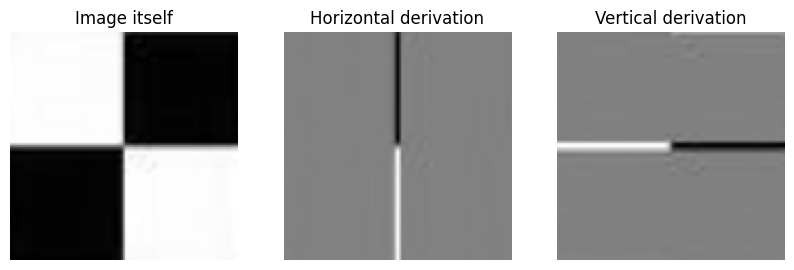

In [83]:
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 3, 1)

plt.imshow(square_gray, cmap='gray')
plt.axis("off")
plt.title("Image itself")

fig.add_subplot(1, 3, 2)

plt.imshow(first_derivative_horizontal_output, cmap='gray')
plt.axis("off")
plt.title("Horizontal derivation")

fig.add_subplot(1, 3, 3)

plt.imshow(first_derivative_vertical_output, cmap='gray')
plt.axis("off")
plt.title("Vertical derivation")

Well, We saw the results as expected.